<a href="https://colab.research.google.com/github/mbl-cin/Sistemas_inteligentes/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score

In [ ]:
from ucimlrepo import fetch_ucirepo

# Dando fetch no dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Pegando os dados e escolhendo as colunas
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features[['Weight', 'Height']]
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

print(X)
print(y)

          Weight    Height
0      64.000000  1.620000
1      56.000000  1.520000
2      77.000000  1.800000
3      87.000000  1.800000
4      89.800000  1.780000
...          ...       ...
2106  131.408528  1.710730
2107  133.742943  1.748584
2108  133.689352  1.752206
2109  133.346641  1.739450
2110  133.472641  1.738836

[2111 rows x 2 columns]
               NObeyesdad
0           Normal_Weight
1           Normal_Weight
2           Normal_Weight
3      Overweight_Level_I
4     Overweight_Level_II
...                   ...
2106     Obesity_Type_III
2107     Obesity_Type_III
2108     Obesity_Type_III
2109     Obesity_Type_III
2110     Obesity_Type_III

[2111 rows x 1 columns]


In [ ]:
# Determinando uma sequência de valores para Eps e Min_samples
eps_values = np.arange(2,8,0.5)
min_samples = np.arange(5,12)

# Organizando os parâmetros a serem passados ao DBSCAN
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
# Organizando todos os dados utilizados e gerados pelo DBSCAN
results = {'Eps': [], 'Min_samples': [], 'No_of_clusters': [], 'Silhouette_score': []}

# Executando o DBSCAN para cada valor dos parâmetros e armazenando o número de clusters e o coeficiente de Silhouette
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    results['Eps'].append(p[0])
    results['Min_samples'].append(p[1])
    results['No_of_clusters'].append(len(np.unique(DBS_clustering.labels_)))
    results['Silhouette_score'].append(silhouette_score(X, DBS_clustering.labels_))

df_results = pd.DataFrame(results)

<ipython-input-12-ef619e5d0784>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_results.pivot('Eps', 'Min_samples', 'Silhouette_score')


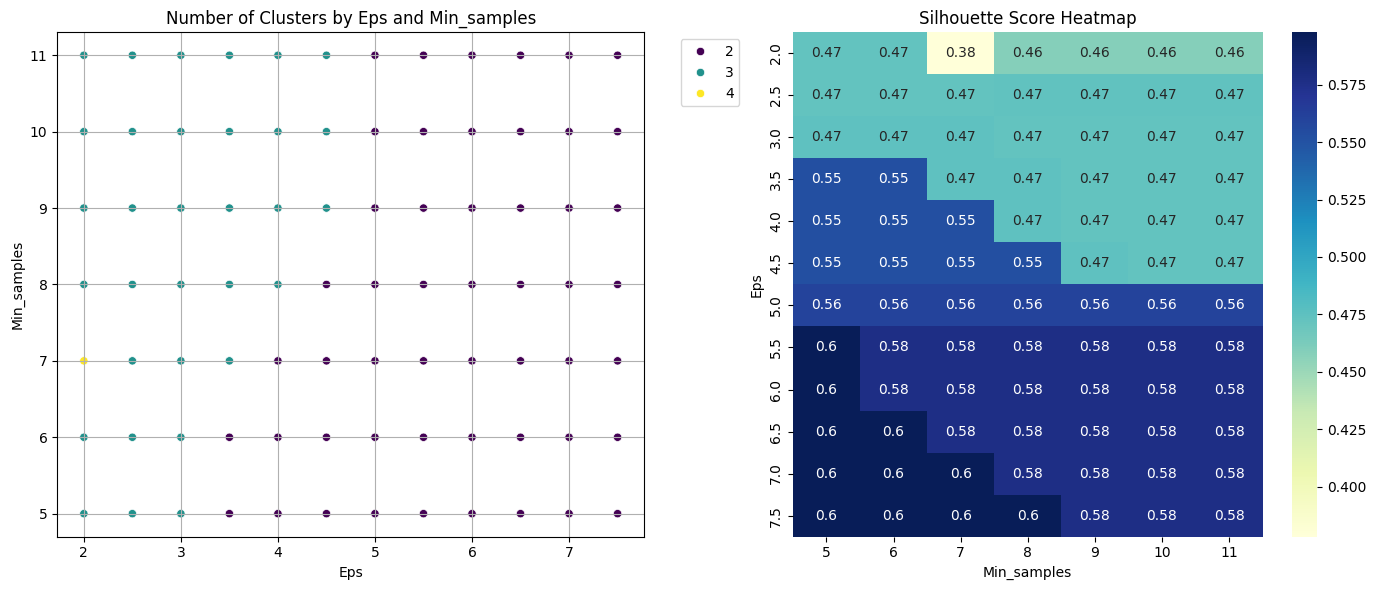

In [ ]:
# Plotando os gráficos que mostram o número de clusters gerados e o Silhouette Score para cada dupla Eps x Min_samples
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_results, x='Eps', y='Min_samples', hue='No_of_clusters', palette='viridis', legend='full')
plt.title('Number of Clusters by Eps and Min_samples')
plt.xlabel('Eps')
plt.ylabel('Min_samples')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
pivot_table = df_results.pivot('Eps', 'Min_samples', 'Silhouette_score')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Silhouette Score Heatmap')

plt.tight_layout()
plt.show()

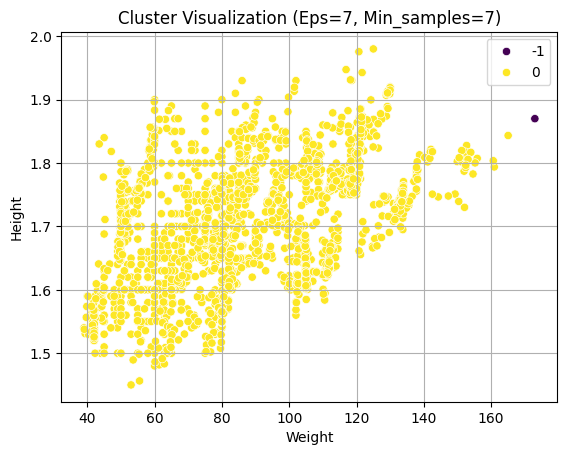

In [ ]:
# Escolhendo valores ótimos de Eps e Min_samples para a visualização da clusterização
eps_value = 6
min_samples_value = 5

# Aplicando o algoritmo DBSCAN com os valores específicos de Eps e Min_samples
DBS_clustering_specific = DBSCAN(eps=eps_value, min_samples=min_samples_value).fit(X)

# Plotando o gráfico da clusterização
sns.scatterplot(x='Weight', y='Height', hue=DBS_clustering_specific.labels_, palette='viridis', data=X)
plt.title('Cluster Visualization (Eps=7, Min_samples=7)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)

plt.show()


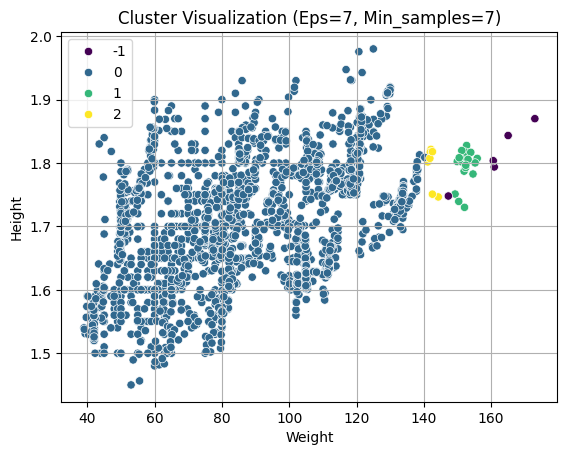

In [ ]:
# Visualização do caso com maior número de clusters
eps_value = 2
min_samples_value = 7

DBS_clustering_specific = DBSCAN(eps=eps_value, min_samples=min_samples_value).fit(X)

sns.scatterplot(x='Weight', y='Height', hue=DBS_clustering_specific.labels_, palette='viridis', data=X)
plt.title('Cluster Visualization (Eps=7, Min_samples=7)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)

plt.show()